# SSH Model
I will study the eigenstates of the SSH point on a discrete lattice. Exact diagonalization will be used to understand the spectrum.

$$ H = \sum_{n=1}^{N} t_1 a_n^\dagger b_n + t_2 b_n^\dagger a_{n+1} + h.c $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
def create_H(N,t1,t2):
    hopping_vec = [t1,t2]*N
    H = np.diag(hopping_vec[:-1],1)
    H += np.diag(hopping_vec[1:],-1)
    return H

[[0 1 0 ... 0 0 0]
 [2 0 2 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 2 0]]


Text(0.5, 0, 'Eigenvalue no.')

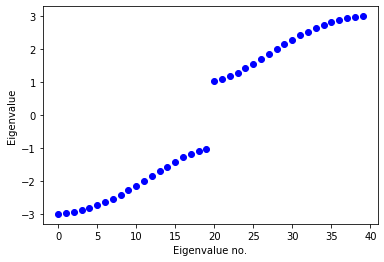

In [3]:
t1,t2 = 1,2
H = create_H(20,t1,t2)
print(H)
w,v = np.linalg.eigh(H)
plt.plot(w,'bo')
plt.ylabel("Eigenvalue")
plt.xlabel("Eigenvalue no.")

## Zero Mode

Text(0.5, 0, 't2')

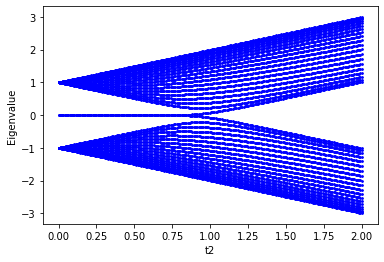

In [4]:
t1 = 1
t2_vec = np.linspace(0,2,250)
for t2 in t2_vec:
    H = create_H(20,t1,t2)
    w,v = np.linalg.eigh(H)
    plt.scatter(t2*np.ones(len(w)),w,color='blue',s=3,marker='o')
plt.ylabel("Eigenvalue")
plt.xlabel("t2")

## Surface plot in the space of t1,t2

In [5]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
t1_vec = np.linspace(-2,2,100)
t2_vec = np.linspace(-2,2,100)
N = 10
w_tensor = np.zeros((len(t1_vec),len(t2_vec),2*N)) 
for ind_t1,t1 in enumerate(t1_vec):
    for ind_t2,t2 in enumerate(t2_vec):
        H = create_H(N,t1,t2)
        w,v = np.linalg.eigh(H)
        w_tensor[ind_t1,ind_t2] = w 
        

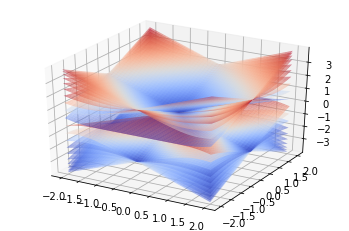

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
XX,YY = np.meshgrid(t1_vec,t2_vec)
for i in range(2*N):
    ax.plot_surface(XX,YY,w_tensor[:,:,i],cmap='coolwarm',alpha=0.5)

In [96]:
%matplotlib inline 